<a href="https://colab.research.google.com/github/imp-etus/Education-Inequality/blob/main/Data%20Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Provide a brief introduction to the purpose of this notebook.

The 2020 [point-in-time count](https://www.kingcounty.gov/elected/executive/constantine/news/release/2020/July/01-homeless-count.aspx) of people experiencing homelessness for Seattle/King County was 11,751. This represents a 5% increase over the 2019 count and reflects similar trend across many counties in the western U.S.. A step towards addressing homelessness is improving our understanding of the relationship between local housing market factors and homelessness. 

The U.S. Department of Housing and Urban Development (HUD) produced a report in 2019 [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) that describes a model-based approach to understanding of the relationship between local housing market factors and homelessness. Our project is motivated by the goals of the HUD study:

"To continue progressing toward the goals of ending and preventing homelessness, we must further our knowledge of the basic community-level determinants of homelessness. The primary objectives of this study are to (1) identify market factors that have established effects on homelessness, (2) construct and evaluate empirical models of community-level homelessness.."

We will investigate whether there are alternative modeling approaches that outperform the models described in the HUD report.


## Import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

The [data](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/05b_analysis_file_update.csv) for this project are described in HUD's report [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) in the section titled DATA.

I will refer you to this section of the HUD report for a detailed description of the sources of the data and how they were processed.

The data dictionary [HUD TO3 - 05b Analysis File - Data Dictionary.csv](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv) contains descriptions of all variables in the data set.




## Load the data

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/homelessness/05b_analysis_file_update.csv')

In [44]:
df_dict = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv')

## Explore the contents of the data set

What variable(s) do we want to predict?

What variables seem useful as predictors?

Are any predictor variables redundant?


### Explore the data sources

Use the dictionary to find the unique `Associated Domain` values.


Make a bar graph of the counts of different data sources described in `Source or Root Variable`. Your graph should have the following features:

1. Order the bars in descending order based on the count.
2. Only include the 10 most common data sources.
3. Orient the plot so that it is easy to read the labels.


In [45]:
counts = df_dict['Source or Root Variable'].value_counts().head(10)
counts

Census ACS 5-Year Estimates                30
Census Intercensal Population Estimates    28
HUD PIT                                    16
HUD                                         8
HUD HIC                                     8
Eviction Lab at Princeton University        6
See hou_mkt_medrent_acs5yr                  6
See hou_mkt_homeval_acs5yr                  6
See hou_mkt_rentvacancy_acs5yr              5
See dem_soc_singparent_acs5yr               5
Name: Source or Root Variable, dtype: int64

## Convert data types, if necessary

## Select relevant subsets of the data

We will explore a subset of the full data set. Keep at least the following columns. You might include more columns though.

In [46]:
columns_to_keep = ["year", "cocnumber",
  
                  "pit_tot_hless_pit_hud", "pit_tot_shelt_pit_hud", "pit_tot_unshelt_pit_hud","dem_pop_pop_census",
  
                  "fhfa_hpi_2009", "ln_hou_mkt_medrent_xt", "hou_mkt_utility_xt", "hou_mkt_burden_own_acs5yr_2017", "hou_mkt_burden_sev_rent_acs_2017", "hou_mkt_rentshare_acs5yr_2017", "hou_mkt_rentvacancy_xt", "hou_mkt_density_dummy", "hou_mkt_evict_count", "hou_mkt_ovrcrowd_acs5yr_2017", "major_city", "suburban",
           
                  "econ_labor_unemp_rate_BLS", "econ_labor_incineq_acs5yr_2017", "econ_labor_pov_pop_census_share",
           
                  "hou_pol_hudunit_psh_hud_share", "hou_pol_occhudunit_psh_hud", "hou_mkt_homeage1940_xt",
           
                  "dem_soc_black_census", "dem_soc_hispanic_census", "dem_soc_asian_census", "dem_soc_pacific_census", "dem_pop_child_census", "dem_pop_senior_census", "dem_pop_female_census", "dem_pop_mig_census", "d_dem_pop_mig_census_share", "dem_soc_singadult_xt", "dem_soc_singparent_xt", "dem_soc_vet_xt", "dem_soc_ed_lessbach_xt", "dem_health_cost_dart", "dem_health_excesdrink_chr",
           
                  "env_wea_avgtemp_noaa", "env_wea_avgtemp_summer_noaa", "env_wea_precip_noaa", "env_wea_precip_annual_noaa"]
    

How many variables of each Associated Domain are in the smaller data set?

What are the data sources in the smaller data set?


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

## Rename columns

In [47]:
df = df.loc[:, columns_to_keep]

In [48]:
df = df.rename(columns = {"cocnumber":"coc_number",
                          "pit_tot_hless_pit_hud":"total_homeless", 
                          "pit_tot_shelt_pit_hud":"total_sheltered", 
                          "pit_tot_unshelt_pit_hud":"total_unsheltered",
                          "dem_pop_pop_census":"total_population",
                          "fhfa_hpi_2009":"house_price_index_2009", 
                          "ln_hou_mkt_medrent_xt":"log_median_rent", 
                          "hou_mkt_utility_xt":"utility_costs", 
                          "hou_mkt_burden_own_acs5yr_2017":"percentage_owners_cost_burden_2016", 
                          "hou_mkt_burden_sev_rent_acs_2017":"percentage_renters_severe_cost_burden_2016", 
                          "hou_mkt_rentshare_acs5yr_2017":"share_renters_2016", 
                          "hou_mkt_rentvacancy_xt":"rental_vacancy_rate", 
                          "hou_mkt_density_dummy":"high_housing_density", 
                          "hou_mkt_evict_count":"number_eviction", 
                          "hou_mkt_ovrcrowd_acs5yr_2017":"share_overcrowded_units_2016", 
                          "major_city":"city_or_urban", 
                          "econ_labor_unemp_rate_BLS":"rate_unemployment", 
                          "econ_labor_incineq_acs5yr_2017":"gini_coefficient_2016", 
                          "econ_labor_pov_pop_census_share":"poverty_rate",        
                          "hou_pol_hudunit_psh_hud_share":"share_HUD_units", 
                          "hou_pol_occhudunit_psh_hud":"HUD_unit_occupancy_rate", 
                          "hou_mkt_homeage1940_xt":"share_built_before_1940",           
                          "dem_soc_black_census":"total_black", 
                          "dem_soc_hispanic_census":"total_latino_hispanic", 
                          "dem_soc_asian_census":"total_asian", 
                          "dem_soc_pacific_census":"total_pacific_islander", 
                          "dem_pop_child_census":"total_population_0_19", 
                          "dem_pop_senior_census":"total_population_65_plus", 
                          "dem_pop_female_census":"total_female_population", 
                          "dem_pop_mig_census":"net_migration", 
                          "d_dem_pop_mig_census_share":"migration_4_year_change", 
                          "dem_soc_singadult_xt":"proportion_one_person_households", 
                          "dem_soc_singparent_xt":"share_under_18_with_single_parent", 
                          "dem_soc_vet_xt":"share_veteran_status", 
                          "dem_soc_ed_lessbach_xt":"share_no_bachelors", 
                          "dem_health_cost_dart":"medicare_reimbursements_per_enrollee", 
                          "dem_health_excesdrink_chr":"percentage_excessive_drinking",
                          "env_wea_avgtemp_noaa":"average_Jan_temperature", 
                          "env_wea_avgtemp_summer_noaa":"average_summer_temperature", 
                          "env_wea_precip_noaa":"total_Jan_precipitation", 
                          "env_wea_precip_annual_noaa":"total_annual_precipitation"})

Rename any additional columns you add that have confusing names.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        3008 non-null   int64  
 1   coc_number                                  3008 non-null   object 
 2   total_homeless                              2994 non-null   float64
 3   total_sheltered                             2994 non-null   float64
 4   total_unsheltered                           2994 non-null   float64
 5   total_population                            3008 non-null   int64  
 6   house_price_index_2009                      3008 non-null   float64
 7   log_median_rent                             1504 non-null   float64
 8   utility_costs                               1504 non-null   float64
 9   percentage_owners_cost_burden_2016          3008 non-null   float64
 10  percentage_r

## Quality Control

Check for out-of-range values or values that do not match what we want to analyze. Either set values to `NaN` or remove the observations, as appropriate.

In [50]:
df.agg(['min', 'max']).round(2).transpose()

,min,max
year,2010,2017
coc_number,AK-500,WY-500
total_homeless,7.0,76501.0
total_sheltered,3.0,72565.0
total_unsheltered,0.0,42828.0
total_population,29344,11058958
house_price_index_2009,-26.5,63.86
log_median_rent,1.24,2.87
utility_costs,5.6,22.6
percentage_owners_cost_burden_2016,8.07,22.96


In [51]:
df['high_housing_density'].value_counts()

0    2256
1     752
Name: high_housing_density, dtype: int64

house_price_index_2009 is that % above/below normal? 

## Identify and deal with missing values

Determine whether there are missing values in the data set. Determine whether you have missing values after focusing on the relevant subset of the data.

<Axes: >

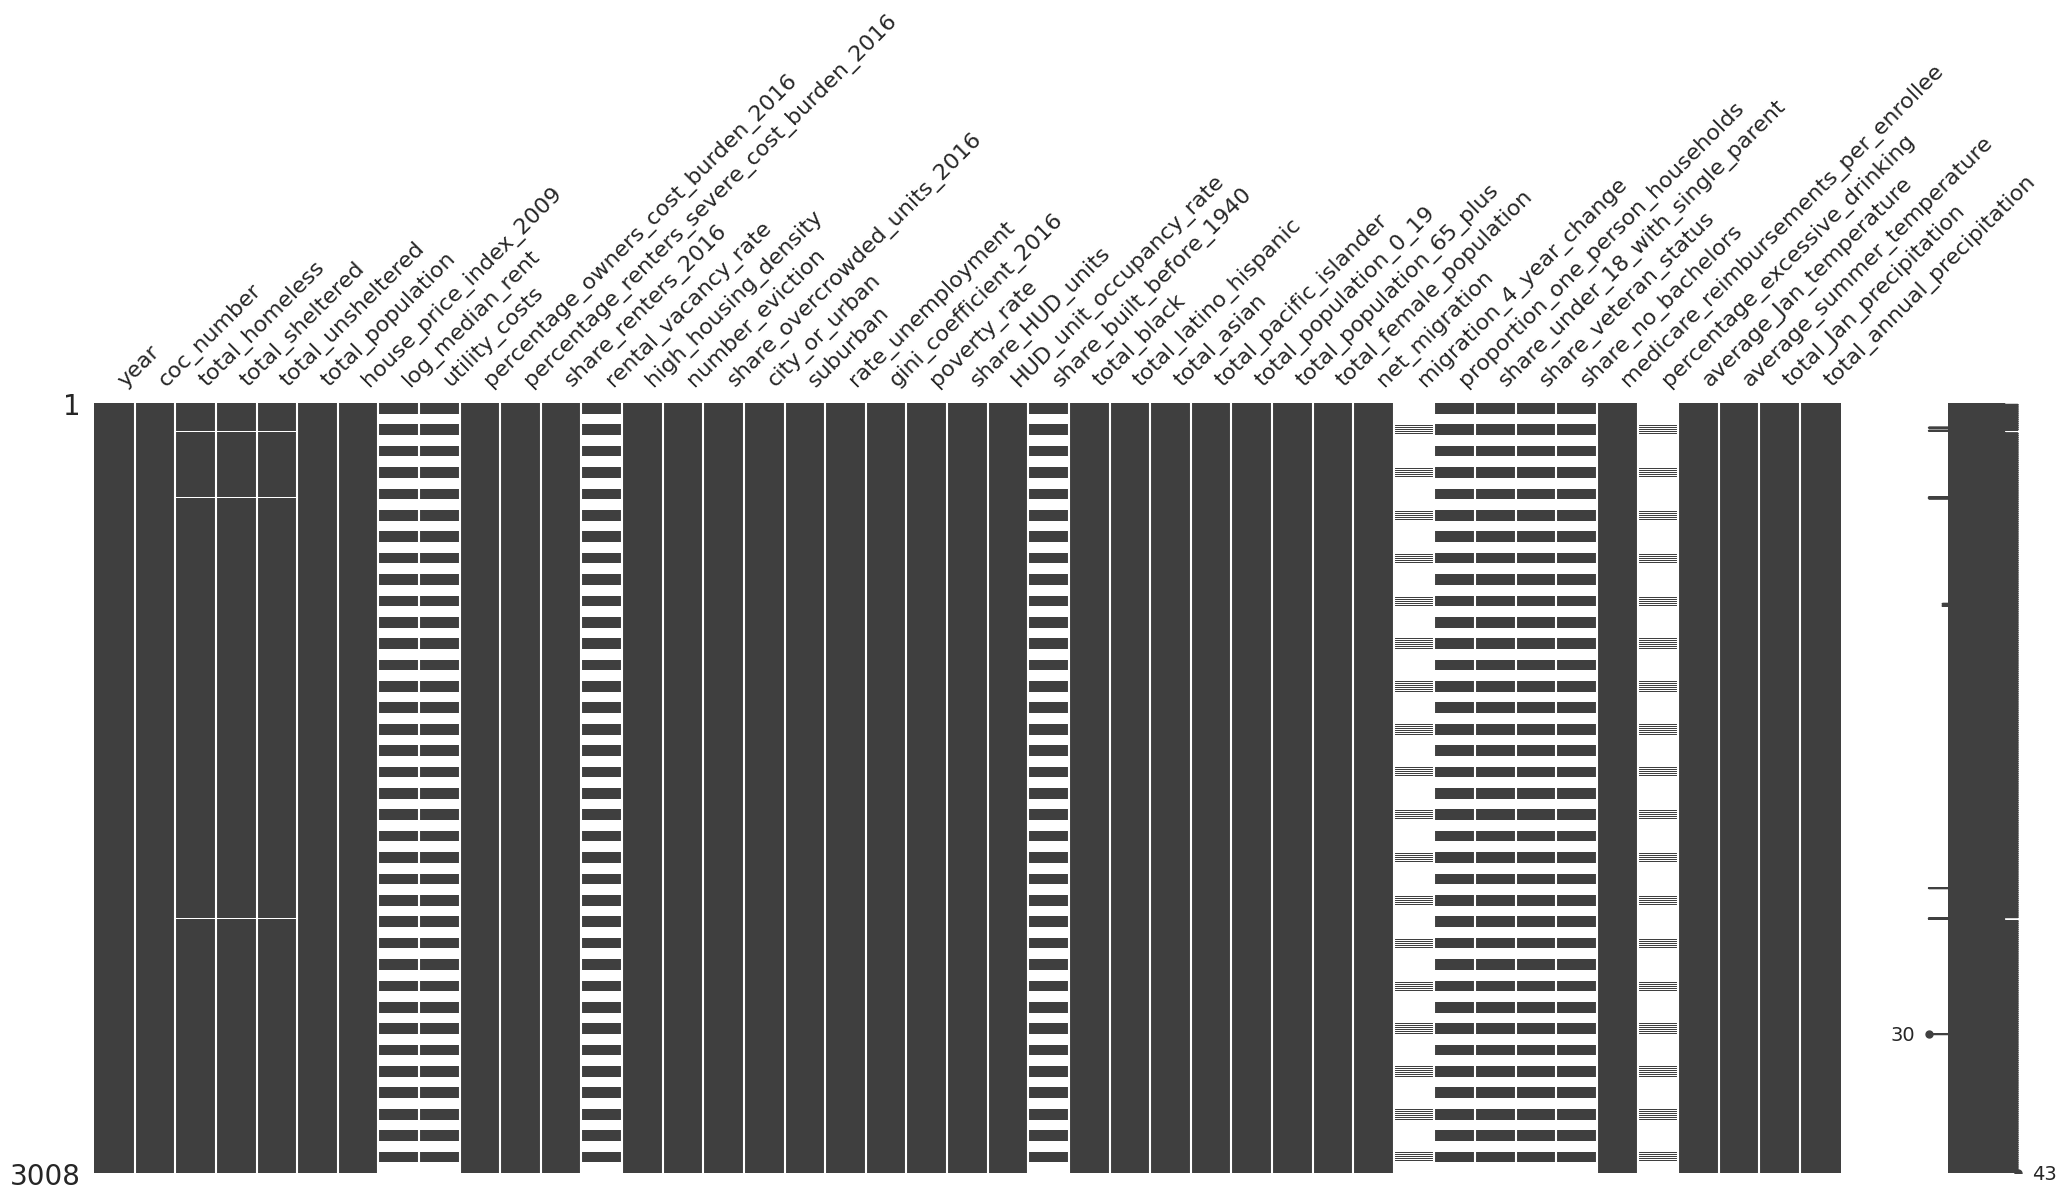

In [52]:
msno.matrix(df)

In [53]:
df.isna().sum()

year                                             0
coc_number                                       0
total_homeless                                  14
total_sheltered                                 14
total_unsheltered                               14
total_population                                 0
house_price_index_2009                           0
log_median_rent                               1504
utility_costs                                 1504
percentage_owners_cost_burden_2016               0
percentage_renters_severe_cost_burden_2016       0
share_renters_2016                               0
rental_vacancy_rate                           1504
high_housing_density                             0
number_eviction                                  0
share_overcrowded_units_2016                     0
city_or_urban                                    0
suburban                                         0
rate_unemployment                                0
gini_coefficient_2016          

Produce scatter plots of the variables that are missing many values vs. time to see if data are missing from particular years.

In [54]:
df.loc[df['total_homeless'].isna()]['year'].value_counts().sort_values()

2011    1
2012    1
2013    1
2015    1
2017    2
2016    2
2010    3
2014    3
Name: year, dtype: int64

In [55]:
df.loc[df['log_median_rent'].isna()]['year'].value_counts()

2010    376
2012    376
2014    376
2016    376
Name: year, dtype: int64

In [56]:
df.loc[df['rental_vacancy_rate'].isna()]['year'].value_counts()

2010    376
2012    376
2014    376
2016    376
Name: year, dtype: int64

In [57]:
df.loc[df['migration_4_year_change'].isna()]['year'].value_counts()

2010    376
2011    376
2012    376
2013    376
2014    376
2015    376
2016    376
Name: year, dtype: int64

In [58]:
df.loc[df['proportion_one_person_households'].isna()]['year'].value_counts()

2010    376
2012    376
2014    376
2016    376
Name: year, dtype: int64

<ipython-input-59-a630cad2dae6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.dropna().corr(), vmin=-1, vmax=1)


<Axes: >

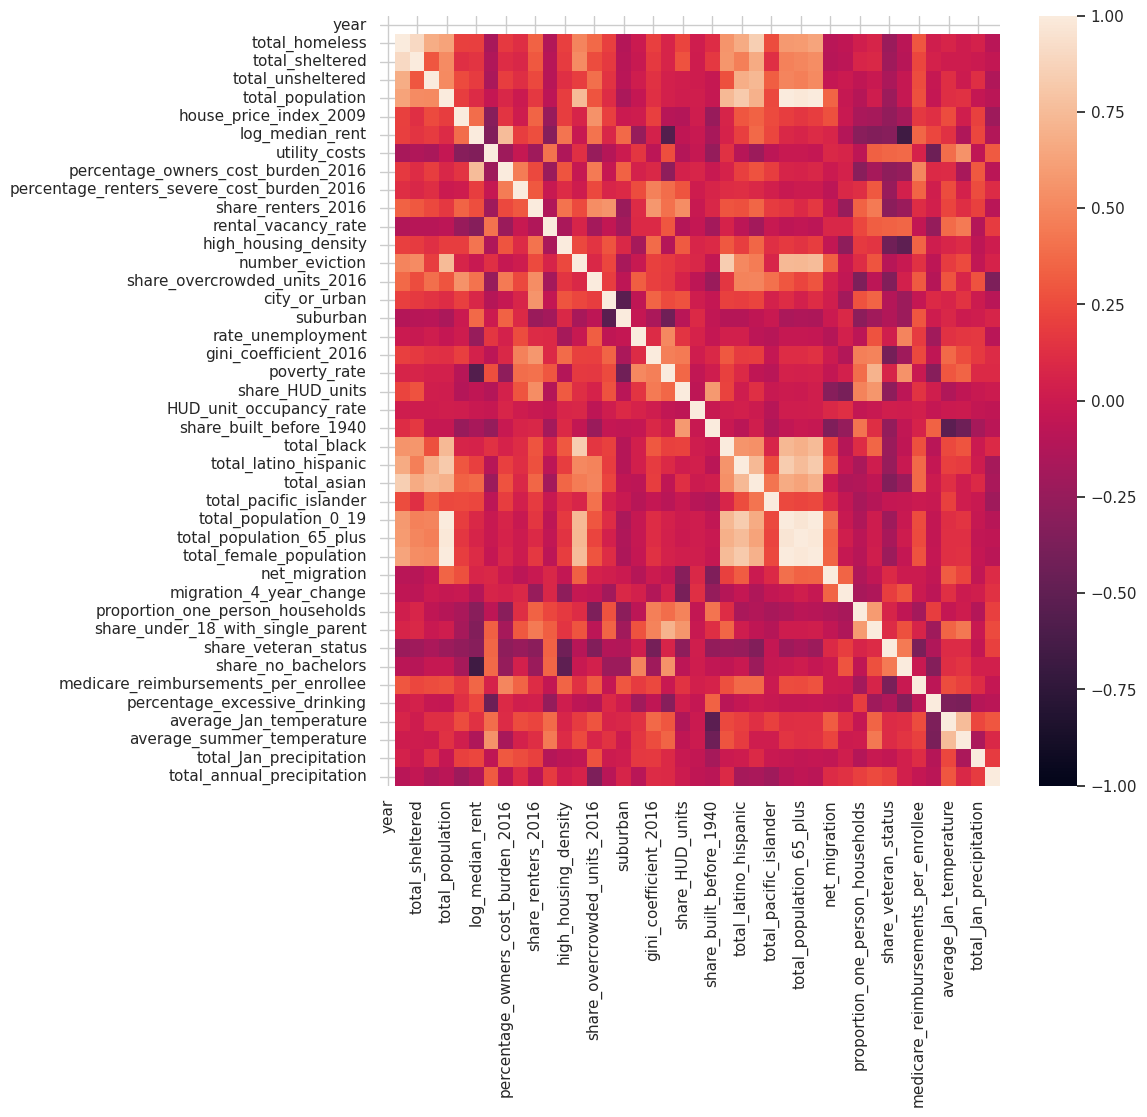

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.dropna().corr(), vmin=-1, vmax=1)

filter to year 2017, only where homeless counts are valid

In [60]:
df_updated = df.dropna(subset=['total_homeless']).loc[df['year'] == 2017]

In [61]:
df_updated

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
7,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,25.046440,23.379078,14.535126,65.634148,8.751520,0.193317,13.800000,60.799999,1.710000,16.500000
15,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,25.689878,19.786558,14.142518,75.560379,9.972870,0.218806,13.800000,60.799999,1.710000,16.500000
23,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,29.430130,32.077599,9.149558,65.983711,9.318163,0.166727,50.995346,80.874313,6.669876,38.593376
31,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,28.982967,33.668129,11.647923,74.543457,8.709522,0.165461,57.893360,81.939949,12.296666,58.519012
39,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,28.329298,27.959316,9.135015,82.332657,8.967195,0.149407,48.382103,79.429985,5.462999,44.778618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2017,WV-500,118.0,111.0,7.0,142272,8.888932,1.459895,16.585392,8.072322,...,32.257992,26.413492,11.331009,77.122894,10.197977,0.128468,35.109627,73.512047,4.164744,42.280125
2983,2017,WV-501,205.0,173.0,32.0,136349,2.793695,1.595035,17.695057,9.171934,...,34.274738,29.276711,10.428111,76.023590,9.372940,0.121457,40.581108,76.372177,4.309402,43.476166
2991,2017,WV-503,319.0,270.0,49.0,274427,3.041601,1.649177,17.768978,8.460396,...,30.329165,26.634947,10.506406,75.165283,9.367138,0.129815,40.225986,75.255028,4.353291,42.982872
2999,2017,WV-508,667.0,567.0,100.0,1275589,4.995708,1.587101,16.804708,9.594313,...,28.878338,23.425161,11.278491,79.828537,9.516158,0.125816,37.575474,73.176598,4.592812,43.718338


<Axes: >

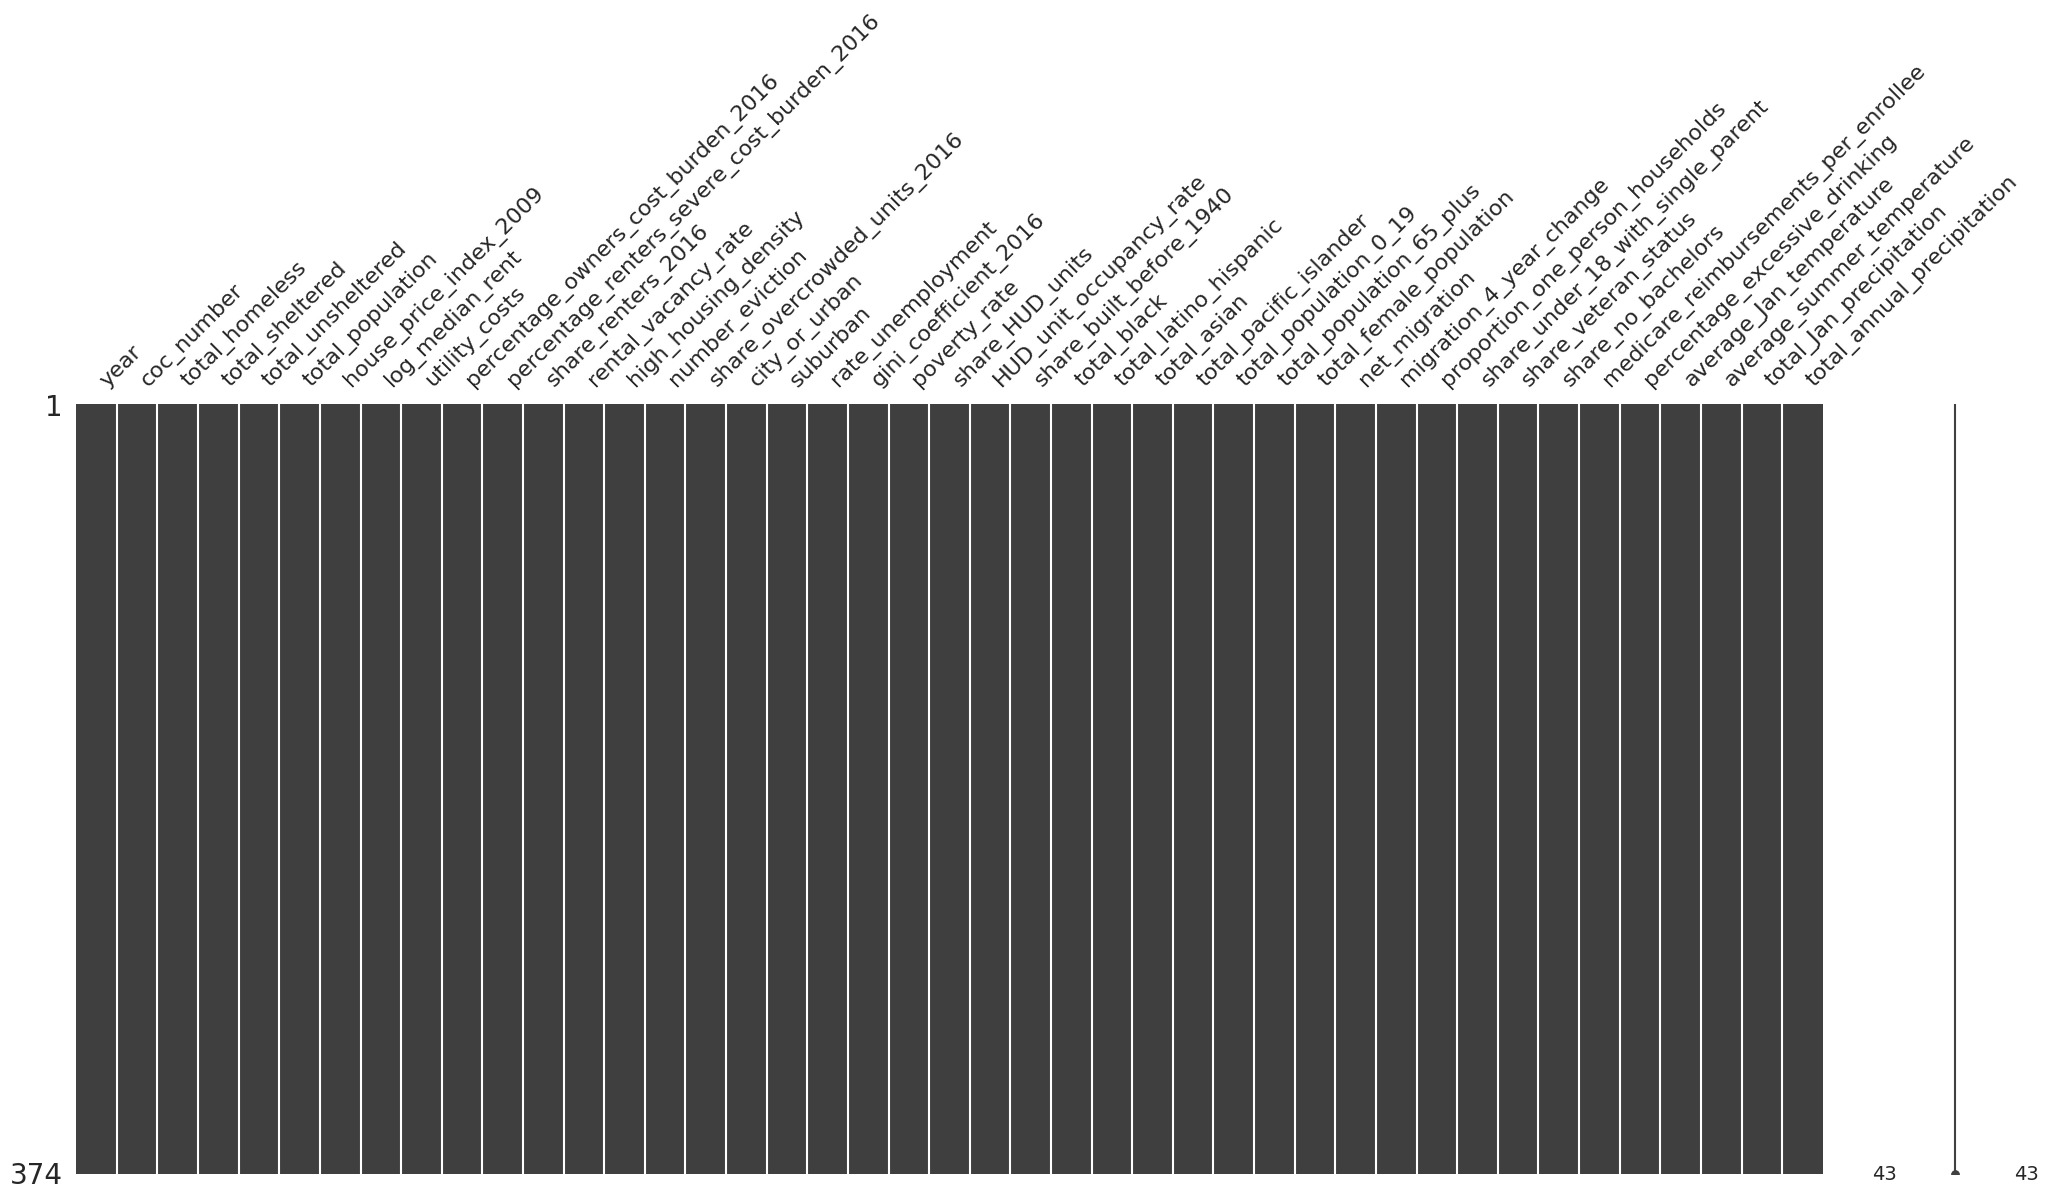

In [62]:
msno.matrix(df_updated)

In [63]:
# convert homeless rates to per 10k, convert other things to %s
df_per10ks = {'total_homeless', 'total_sheltered', 'total_unsheltered'}
df_rates = {'total_homeless', 'total_sheltered', 'total_unsheltered', "total_black", "total_latino_hispanic", "total_asian", "total_pacific_islander", "total_population_0_19", "total_population_65_plus", "total_female_population"}

In [64]:
for col in df_rates:
  df_updated[col] = df_updated[col] / df_updated['total_population']

In [65]:
for col in df_per10ks:
  df_updated[col] = df_updated[col] * 10_000

In [66]:
df_updated

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
7,2017,AK-500,37.931777,32.719520,5.212257,297376,11.743647,2.438863,8.500000,15.334315,...,25.046440,23.379078,14.535126,65.634148,8.751520,0.193317,13.800000,60.799999,1.710000,16.500000
15,2017,AK-501,16.143340,13.013739,3.129602,444146,9.042710,2.249699,14.607715,13.311670,...,25.689878,19.786558,14.142518,75.560379,9.972870,0.218806,13.800000,60.799999,1.710000,16.500000
23,2017,AL-500,11.395155,9.130733,2.264422,958302,-0.852477,1.862248,19.492331,12.188416,...,29.430130,32.077599,9.149558,65.983711,9.318163,0.166727,50.995346,80.874313,6.669876,38.593376
31,2017,AL-501,9.737114,5.479135,4.257979,622361,-8.507004,1.858394,18.899839,12.539132,...,28.982967,33.668129,11.647923,74.543457,8.709522,0.165461,57.893360,81.939949,12.296666,58.519012
39,2017,AL-502,5.843235,5.013873,0.829362,265264,0.751167,1.362010,18.803186,10.374694,...,28.329298,27.959316,9.135015,82.332657,8.967195,0.149407,48.382103,79.429985,5.462999,44.778618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2017,WV-500,8.293972,7.801957,0.492015,142272,8.888932,1.459895,16.585392,8.072322,...,32.257992,26.413492,11.331009,77.122894,10.197977,0.128468,35.109627,73.512047,4.164744,42.280125
2983,2017,WV-501,15.034947,12.688029,2.346919,136349,2.793695,1.595035,17.695057,9.171934,...,34.274738,29.276711,10.428111,76.023590,9.372940,0.121457,40.581108,76.372177,4.309402,43.476166
2991,2017,WV-503,11.624221,9.838682,1.785539,274427,3.041601,1.649177,17.768978,8.460396,...,30.329165,26.634947,10.506406,75.165283,9.367138,0.129815,40.225986,75.255028,4.353291,42.982872
2999,2017,WV-508,5.228957,4.445005,0.783952,1275589,4.995708,1.587101,16.804708,9.594313,...,28.878338,23.425161,11.278491,79.828537,9.516158,0.125816,37.575474,73.176598,4.592812,43.718338


In [67]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 7 to 3007
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        374 non-null    int64  
 1   coc_number                                  374 non-null    object 
 2   total_homeless                              374 non-null    float64
 3   total_sheltered                             374 non-null    float64
 4   total_unsheltered                           374 non-null    float64
 5   total_population                            374 non-null    int64  
 6   house_price_index_2009                      374 non-null    float64
 7   log_median_rent                             374 non-null    float64
 8   utility_costs                               374 non-null    float64
 9   percentage_owners_cost_burden_2016          374 non-null    float64
 10  percentage_re

In [68]:
df_updated = df_updated.rename(columns={'total_homeless':'homeless_per_10k', 
'total_sheltered':'sheltered_per_10k', 
'total_unsheltered':'unsheltered_per_10k',
'total_black':'rate_black', 
'total_latino_hispanic':'rate_latino_hispanic', 
'total_asian':'rate_asian', 
'total_pacific_islander':'rate_pacific_islander', 
'total_population_0_19':'rate_0_19', 
'total_population_65_plus':'rate_65_plus', 
'total_female_population':'rate_female'})

In [69]:
df_updated.head(5).transpose()

,7,15,23,31,39
year,2017,2017,2017,2017,2017
coc_number,AK-500,AK-501,AL-500,AL-501,AL-502
homeless_per_10k,37.931777,16.14334,11.395155,9.737114,5.843235
sheltered_per_10k,32.71952,13.013739,9.130733,5.479135,5.013873
unsheltered_per_10k,5.212257,3.129602,2.264422,4.257979,0.829362
total_population,297376,444146,958302,622361,265264
house_price_index_2009,11.743647,9.04271,-0.852477,-8.507004,0.751167
log_median_rent,2.438863,2.249699,1.862248,1.858394,1.36201
utility_costs,8.5,14.607715,19.492331,18.899839,18.803186
percentage_owners_cost_burden_2016,15.334315,13.31167,12.188416,12.539132,10.374694


## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. Or, we might not create any new columns. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv file

Export the clean data set

In [70]:
from google.colab import files
df_updated.to_csv('homelessness_data.csv', encoding='utf-8-sig', index=False)
files.download('homelessness_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>